In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
# Parámetros del modelo / datos
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
# Cargar los datos y dividir entre conjuntos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Escalar las imágenes al rango [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Asegurar que las imágenes tengan forma (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertir los vectores de clases a matrices de clases binarias
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
# Construir el modelo
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(num_classes, activation="softmax"),
])

# Compilar el modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenar el modelo
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)




Epoch 1/15


422/422 [==============================] - 6s 12ms/step - loss: 0.6942 - accuracy: 0.7508 - val_loss: 0.4398 - val_accuracy: 0.8413
Epoch 2/15
422/422 [==============================] - 5s 11ms/step - loss: 0.4469 - accuracy: 0.8398 - val_loss: 0.3924 - val_accuracy: 0.8630
Epoch 3/15
422/422 [==============================] - 5s 11ms/step - loss: 0.4035 - accuracy: 0.8564 - val_loss: 0.3583 - val_accuracy: 0.8717
Epoch 4/15
422/422 [==============================] - 5s 11ms/step - loss: 0.3705 - accuracy: 0.8679 - val_loss: 0.3317 - val_accuracy: 0.8788
Epoch 5/15
422/422 [==============================] - 5s 11ms/step - loss: 0.3511 - accuracy: 0.8747 - val_loss: 0.3102 - val_accuracy: 0.8878
Epoch 6/15
422/422 [==============================] - 5s 11ms/step - loss: 0.3299 - accuracy: 0.8821 - val_loss: 0.2981 - val_accuracy: 0.8933
Epoch 7/15
422/422 [==============================] - 5s 11ms/step - loss: 0.3194 - accuracy: 0.8857 - val_loss: 0.2877 - val_accuracy: 0

In [5]:
# Evaluar el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Pérdida en prueba: {score[0]}")
print(f"Precisión en prueba: {score[1]}")

# Predecir sobre los conjuntos de entrenamiento y prueba para obtener las etiquetas predichas
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_train_pred_labels = np.argmax(y_train_pred, axis=1)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_true_train = np.argmax(y_train, axis=1)
y_true_test = np.argmax(y_test, axis=1)

Pérdida en prueba: 0.2726919651031494
Precisión en prueba: 0.9025999903678894
313/313 [==============================] - 0s 1ms/step


In [6]:
# Generar las matrices de confusión
cm_train = confusion_matrix(y_true_train, y_train_pred_labels)
cm_test = confusion_matrix(y_true_test, y_test_pred_labels)


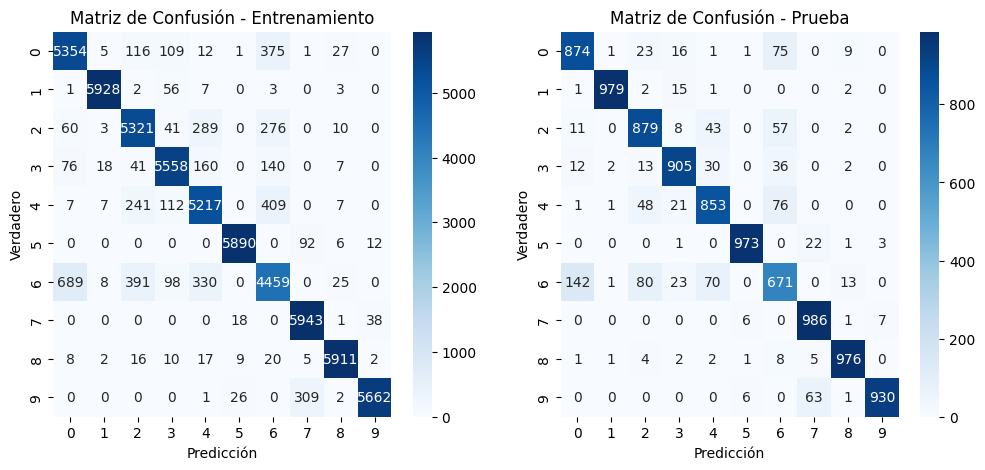

In [7]:

# Visualizar las matrices de confusión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Entrenamiento")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Prueba")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()